# Name : Mann Dsylva
# Roll no : 24mai009
#Machine Learning
#Support Vector Machine

In [69]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('mobile_price_train.csv')
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [70]:
#Features
X = df_train.drop('price_range',axis='columns')     #axis=columns:- to drop column, axis='rows':- to drop rows
#Labels
Y = df_train[['price_range']]

#Train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8)

In [71]:
from sklearn.svm import SVC
import numpy as np
smodel1 = SVC(kernel='linear',probability=True)

ytrain=np.array(ytrain).ravel()
smodel1.fit(xtrain,ytrain)

SVC(kernel='linear', probability=True)

In [72]:
print(smodel1.score(xtrain,ytrain))
print(smodel1.score(xtest,ytest))

0.99
0.9725


In [73]:
#Plynomial Kernel
smodel2 = SVC(kernel='poly')
smodel2.fit(xtrain,ytrain)
print(smodel2.score(xtrain,ytrain))
print(smodel2.score(xtest,ytest))

0.960625
0.9325


In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain,smodel1.predict(xtrain))

array([[400,   0,   0,   0],
       [  0, 393,   2,   0],
       [  0,   5, 397,   6],
       [  0,   0,   3, 394]])

In [75]:
confusion_matrix(ytest,smodel1.predict(xtest))

array([[ 98,   2,   0,   0],
       [  3, 101,   1,   0],
       [  0,   3,  88,   1],
       [  0,   0,   1, 102]])

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ytest_pred_prob = smodel1.predict_proba(xtest)


In [77]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Assuming n_class is the number of classes (e.g., 4)
ytest_binarized = label_binarize(ytest, classes=[0, 1, 2, 3])

fpr = {}
tpr = {}
thresh = {}

n_class = 4  # Number of classes

for i in range(n_class):
    # For each class, compute ROC curve
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest_binarized[:, i], ytest_pred_prob[:, i])

print(ytest_pred_prob.shape)


(400, 4)


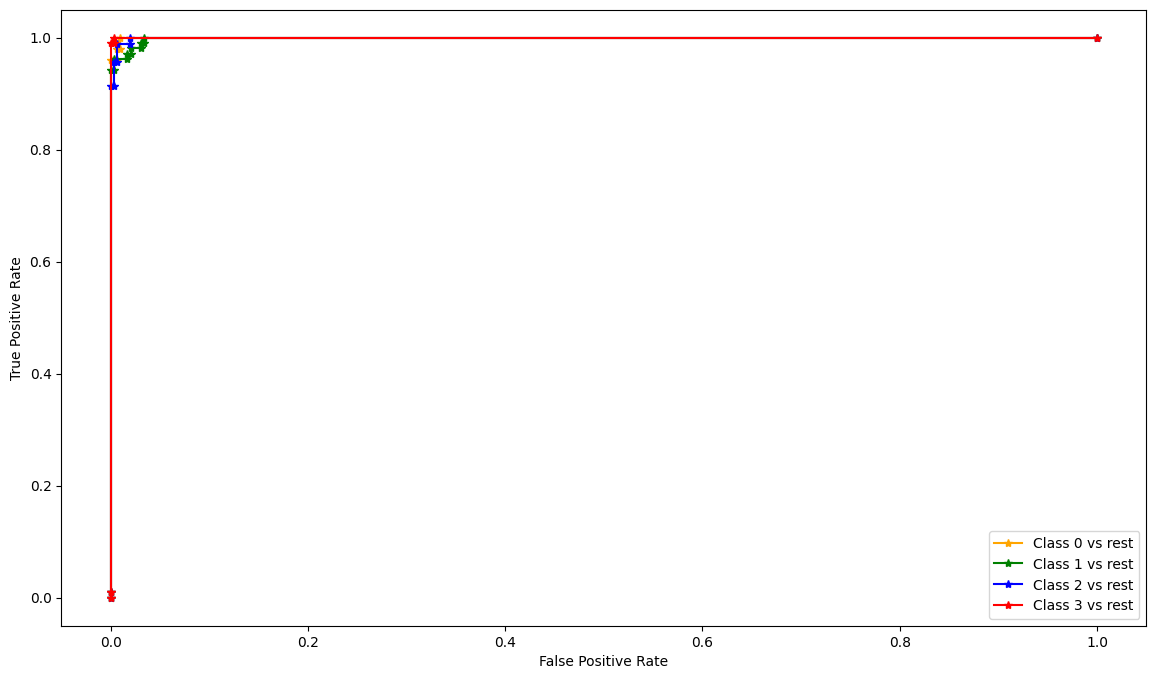

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))

plt.plot(fpr[0] , tpr[0] , marker='*' , color='orange' , label='Class 0 vs rest')
plt.plot(fpr[1] , tpr[1] , marker='*' , color='green' , label='Class 1 vs rest')
plt.plot(fpr[2] , tpr[2] , marker='*' , color='blue' , label='Class 2 vs rest')
plt.plot(fpr[3] , tpr[3] , marker='*' , color='red' , label='Class 3 vs rest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [79]:
df_test = pd.read_csv('mobile_price_test.csv').drop('id',axis='columns')
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [80]:
print(smodel1.predict([df_test.loc[25]]))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [81]:
new_features = [1056,1,1.5,1,14,1,25,0.5,190,5,12,225,1200,3476,12,8,7,0,1,1]
print(smodel1.predict([new_features]))

[3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [82]:
smodel1.predict(df_test)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 2, 2, 3, 2, 2, 1, 1, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

#Principal Component Analysis[PCA] or Dimensionality Reduction

In [83]:
import pandas as pd
df_train = pd.read_csv('mobile_price_train.csv')

#Features
#axis=columns:- to drop column, axis='rows':- to drop rows
X = df_train.drop('price_range',axis='columns')
#Labels
Y = df_train[['price_range']]

#Train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8)

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)

pca.fit(xtrain)

xtrain_pca = pca.transform(xtrain)
xtest_pca = pca.transform(xtest)

pca.explained_variance_ratio_

array([0.67525171, 0.16257715, 0.1076439 , 0.05355816])

In [85]:
pca.explained_variance_

array([1201918.82446721,  289380.28363006,  191601.48974753,
         95331.20802799])

In [86]:
#build a model on pca decomposed feature and calculate accuracy
from sklearn.svm import SVC
import numpy as np
smodel3 = SVC(kernel='linear',probability=True)

ytrain=np.array(ytrain).ravel()
smodel3.fit(xtrain_pca,ytrain)

SVC(kernel='linear', probability=True)

In [87]:
print(smodel3.score(xtrain_pca,ytrain))
print(smodel3.score(xtest_pca,ytest))

0.961875
0.9675


In [88]:
xtrain_pca

array([[ -252.36790465,   -76.18246098,  -397.58377355,   347.54342633],
       [  913.46361191,  -262.57421984,   550.14766973,  -211.10322659],
       [-1705.8548929 ,  -109.18846779,  -183.74996747,   103.12590045],
       ...,
       [ -425.5277924 ,  -289.56436459,  -145.30475051,    55.54014947],
       [ -801.16181667,   352.06957036,  -497.68103412,  -362.21245031],
       [ -249.4156443 ,   672.6961157 ,  -453.13554458,  -390.54918765]])

In [89]:
xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
991,860,1,1.6,1,13,0,48,0.5,187,7,18,335,1463,1870,17,2,18,1,0,0
1856,1786,0,2.6,0,6,0,14,1.0,115,4,15,616,912,3038,18,0,14,1,0,0
378,1058,0,1.5,0,2,0,19,0.4,166,4,14,493,1247,418,9,7,16,0,0,1
1970,1913,1,1.8,0,0,0,29,0.6,111,5,4,675,742,2023,17,13,8,1,1,0
500,1278,1,0.5,1,1,0,54,0.1,104,8,16,581,750,1155,7,1,20,0,0,1


#For PCA
#Calculating covariance and eigen vector using the co-variance matrix for the data given and Projecting the data points on eigen vector derived

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Load the data from the CSV file
data = pd.read_csv('mobile_price_test.csv')

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
data = pd.DataFrame(scaled_data, columns=data.columns)

data.head()

# mean_data = np.mean(data, axis=0)
# std_data = np.std(data, axis=0)
# scaled_data = (data - mean_data) / std_data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-1.730320,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,...,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099
1,-1.726856,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,...,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099
2,-1.723391,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,...,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097
3,-1.719927,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,...,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099
4,-1.716463,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,...,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097


In [103]:
# Step 3: Calculate the covariance matrix

cov_matrix = np.cov(data, rowvar=False)
print("Covariance Matrix:\n",cov_matrix)

Covariance Matrix:
 [[ 1.00100100e+00 -2.15329618e-02  4.64892589e-04  3.59530419e-02
  -2.72361788e-03  1.69507904e-02  3.09515987e-02 -1.40374444e-02
  -2.79720461e-03 -7.54866516e-03 -1.59504513e-02  1.97055651e-03
  -2.50812535e-02 -1.21499059e-02 -4.34856378e-02 -1.19838857e-02
   2.92104778e-03  3.08380399e-02  4.96206098e-02  3.98077141e-02
  -3.66800924e-02]
 [-2.15329618e-02  1.00100100e+00 -4.66562878e-02 -3.91145443e-02
  -6.12321284e-02 -7.85396372e-03 -4.25626221e-02  3.75467959e-03
  -9.07396783e-03 -4.71117696e-02  2.57573155e-02  1.28595659e-02
   4.86955767e-02  5.34188165e-02 -3.23980372e-02 -5.57209418e-02
  -2.39287114e-02  1.55615740e-02  3.15457112e-02 -1.01479888e-02
  -4.14899335e-04]
 [ 4.64892589e-04 -4.66562878e-02  1.00100100e+00  3.47887857e-02
  -1.11112103e-02 -5.61195292e-02 -1.17016383e-03 -1.24287558e-02
   1.83377759e-02  2.35369049e-02  3.28610695e-03 -2.52723972e-02
  -5.88689673e-02 -3.20856684e-02  5.76276136e-02  1.27924509e-02
   4.22730773e-03 

In [104]:
# Step 4: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Number of eigenvalues are >>>>",eigenvalues.size)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [1.73970435 1.58943951 1.55969921 1.52491925 0.33433199 0.43067913
 0.49042597 0.47401914 0.80409433 1.18167539 1.13573761 1.11507647
 1.07595966 0.86453989 0.89327708 0.9189611  0.92629482 0.96984259
 1.00592735 0.98993866 0.99647751]
Number of eigenvalues are >>>> 21
Eigenvectors:
 [[ 3.18093909e-02 -5.29577999e-02 -8.06943624e-02  1.84354824e-02
  -1.56514113e-02  2.37082970e-02  2.79045183e-02  1.13788606e-02
  -1.28151784e-01 -3.00359539e-03  4.52326339e-01  1.59163520e-01
  -2.28537232e-01 -1.28146367e-01  4.91882682e-01 -1.68941389e-01
  -1.74784718e-01 -1.98855023e-01 -1.91245568e-01  4.07761524e-01
   3.59409353e-01]
 [ 2.02288207e-02 -5.52138214e-02  6.36605327e-02 -1.39571846e-01
   2.72971606e-02  9.04300266e-02  4.44212928e-02  4.40550893e-02
   2.10844809e-01 -4.48687182e-01 -1.25923186e-01 -1.94654590e-01
  -1.02601119e-01  9.05369626e-02  1.45315399e-01 -7.99038453e-02
  -6.84734670e-01  3.22313735e-01 -1.15525415e-01  7.05199982e-04
  -1.68315796e-01]
 [-

In [105]:
# Step 5: Project the data points onto the eigenvectors (principal components)

projected_data = scaled_data @ eigenvectors

# Calculate variance of the projected data
variance_projected_data = np.var(projected_data, axis=0)
print("Projected Data:\n", projected_data)

Projected Data:
 [[ 1.53565397  2.67965994 -0.24009406 ... -0.73240864 -1.09105266
  -1.4598357 ]
 [ 0.01921007 -0.94706712 -1.51538976 ...  1.07085773  0.86132729
  -1.41981595]
 [-1.13293825  1.0552696   2.88401253 ...  1.60606993 -0.82844235
  -0.4851556 ]
 ...
 [-0.37270401 -1.25005744 -1.49343743 ... -2.78001143  0.99880792
   0.58958191]
 [-1.10999702  2.29173333  0.03339707 ... -0.40131119  1.29150735
  -0.76482087]
 [ 0.03151446 -0.28553173 -2.5345054  ... -0.26197143  1.39539663
   0.67445532]]


In [94]:
# Step 6: Proof - The variance of the projected data along each principal component corresponds to the eigenvalues
projected_data = data @ eigenvectors
# variance_projected_data = np.var(projected_data, axis=0)
variance_projected_data = np.var(projected_data, axis=0, ddof=0)  # Default is ddof=0, biased
print("Variance of Projected Data (should match eigenvalues):\n", variance_projected_data)
print("Number of projected data is >>>",variance_projected_data.size)

Variance of Projected Data (should match eigenvalues):
 0     1.183467e+06
1     2.905053e+05
2     1.848783e+05
3     8.293553e+04
4     9.150411e+04
5     1.209138e+03
6     3.282146e+02
7     4.829322e+01
8     3.055868e+01
9     2.656235e+01
10    9.180109e+00
11    8.536998e+00
12    5.149744e+00
13    6.759349e-01
14    9.338506e-02
15    7.682491e-02
16    3.364220e-01
17    2.662857e-01
18    2.553929e-01
19    2.270849e-01
20    2.331804e-01
dtype: float64
Number of projected data is >>> 21


In [106]:
# Sort and compare as before
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_variance_projected_data = variance_projected_data[sorted_indices]

# Round to 1 decimal place
rounded_eigenvalues = np.round(sorted_eigenvalues, 1)
rounded_variance_projected_data = np.round(sorted_variance_projected_data, 1)

# Print for verification
print("Rounded Eigenvalues: ", rounded_eigenvalues)
print("Rounded Variance of Projected Data: ", rounded_variance_projected_data)

Rounded Eigenvalues:  [1.7 1.6 1.6 1.5 1.2 1.1 1.1 1.1 1.  1.  1.  1.  0.9 0.9 0.9 0.9 0.8 0.5
 0.5 0.4 0.3]
Rounded Variance of Projected Data:  [1.7 1.6 1.6 1.5 1.2 1.1 1.1 1.1 1.  1.  1.  1.  0.9 0.9 0.9 0.9 0.8 0.5
 0.5 0.4 0.3]


In [107]:
assert np.all(rounded_variance_projected_data == rounded_eigenvalues), "Rounded variance of
    projected points does not match the rounded eigenvalues!"

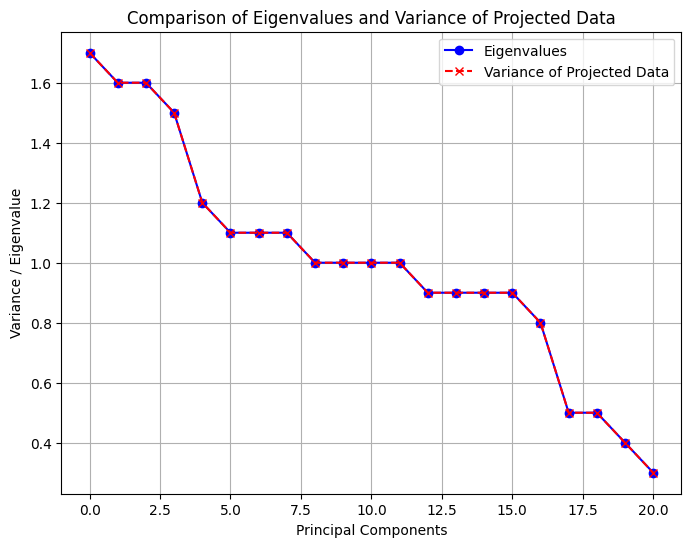

In [109]:
# Step 7: Proof - Eigenvector with the largest eigenvalue captures the direction of greatest variance

plt.figure(figsize=(8, 6))
plt.plot(rounded_eigenvalues, label="Eigenvalues", marker='o', linestyle='-', color='b')
plt.plot(rounded_variance_projected_data, label="Variance of Projected Data", marker='x', linestyle='--', color='r')
plt.xlabel('Principal Components')
plt.ylabel('Variance / Eigenvalue')
plt.title('Comparison of Eigenvalues and Variance of Projected Data')
plt.legend()
plt.grid(True)
plt.show()

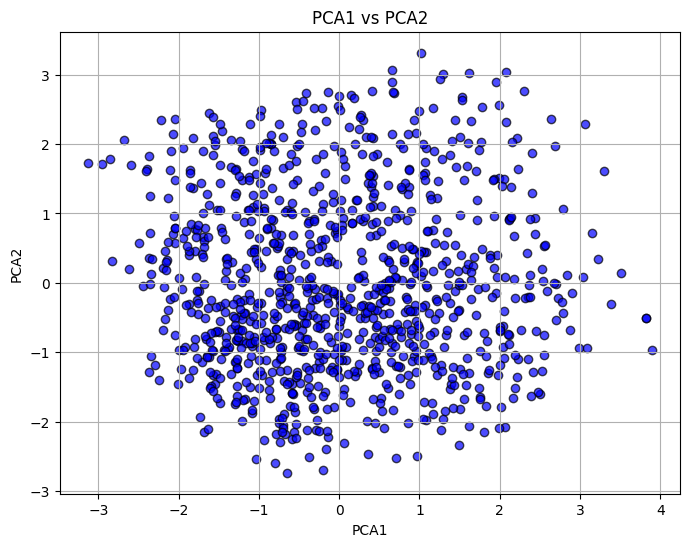

In [111]:
# Extract PCA1 and PCA2 (the first two principal components)
pca1 = projected_data[:, 0]  # First principal component
pca2 = projected_data[:, 1]  # Second principal component

plt.figure(figsize=(8, 6))
plt.scatter(pca1, pca2, alpha=0.7, c='blue', edgecolors='k')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA1 vs PCA2')
plt.grid(True)
plt.show()

In [112]:
# Proof 2: Eigenvector with the largest eigenvalue points in the direction of the greatest variance
print("Eigenvector with the largest eigenvalue points in the direction of the greatest variance")
print("Eigenvalue 1: ", eigenvalues[0], "\t Eigenvector: ", eigenvectors[:, 0])
print("Eigenvalue 2: ", eigenvalues[1], "\t Eigenvector: ", eigenvectors[:, 1])

Eigenvector with the largest eigenvalue points in the direction of the greatest variance
Eigenvalue 1:  1.7397043493824593 	 Eigenvector:  [ 0.03180939  0.02022882 -0.10341917  0.0782486   0.11615403  0.61710402
  0.16961166 -0.00656861  0.06435998  0.01279151  0.01597581  0.62793229
  0.21563395  0.26391169 -0.06761121  0.05003821  0.03036676 -0.03550427
  0.10737344  0.03966365 -0.14585181]
Eigenvalue 2:  1.5894395128898116 	 Eigenvector:  [-5.29577999e-02 -5.52138214e-02 -1.16060347e-04  2.02641209e-02
  1.85843631e-02  2.40750934e-01 -5.79327001e-01  6.41750981e-02
 -3.59817967e-02  3.19920180e-02 -5.07288923e-02  2.22797394e-01
 -2.77009872e-01 -2.84638822e-01 -8.50198449e-02  1.27883642e-01
  7.45799691e-02 -8.57225446e-02 -5.83124438e-01  4.76202276e-02
  6.79170101e-02]
